# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7, 4]

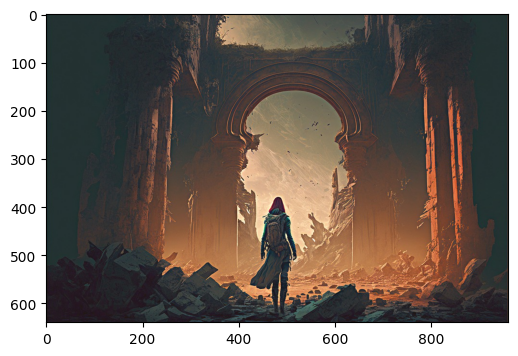

In [52]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

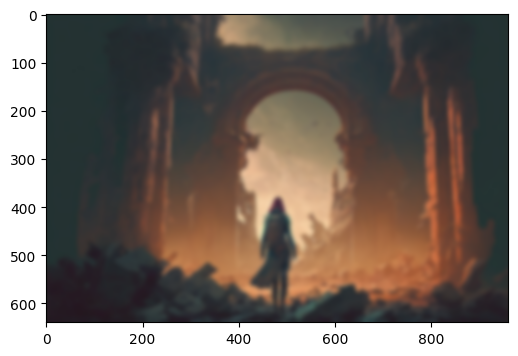

In [53]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = img.astype(np.int16)
unsharp = cv2.GaussianBlur(img, ksize=(0, 0), sigmaX=5)
plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-203..192].


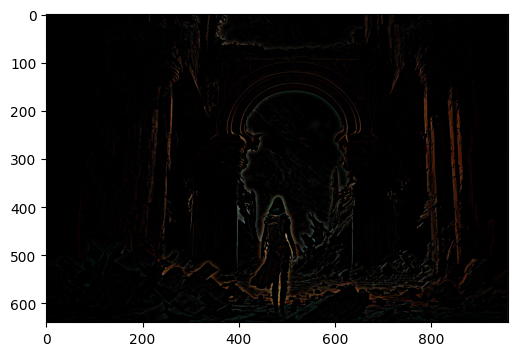

In [54]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.int16)
diff -= unsharp
# DO NOT CLIP HERE TO AVOID MISREPRESENTATION IN FURTHER OPERATIONS
#diff = np.clip(diff - unsharp, 0, 255)
plt.imshow(diff)

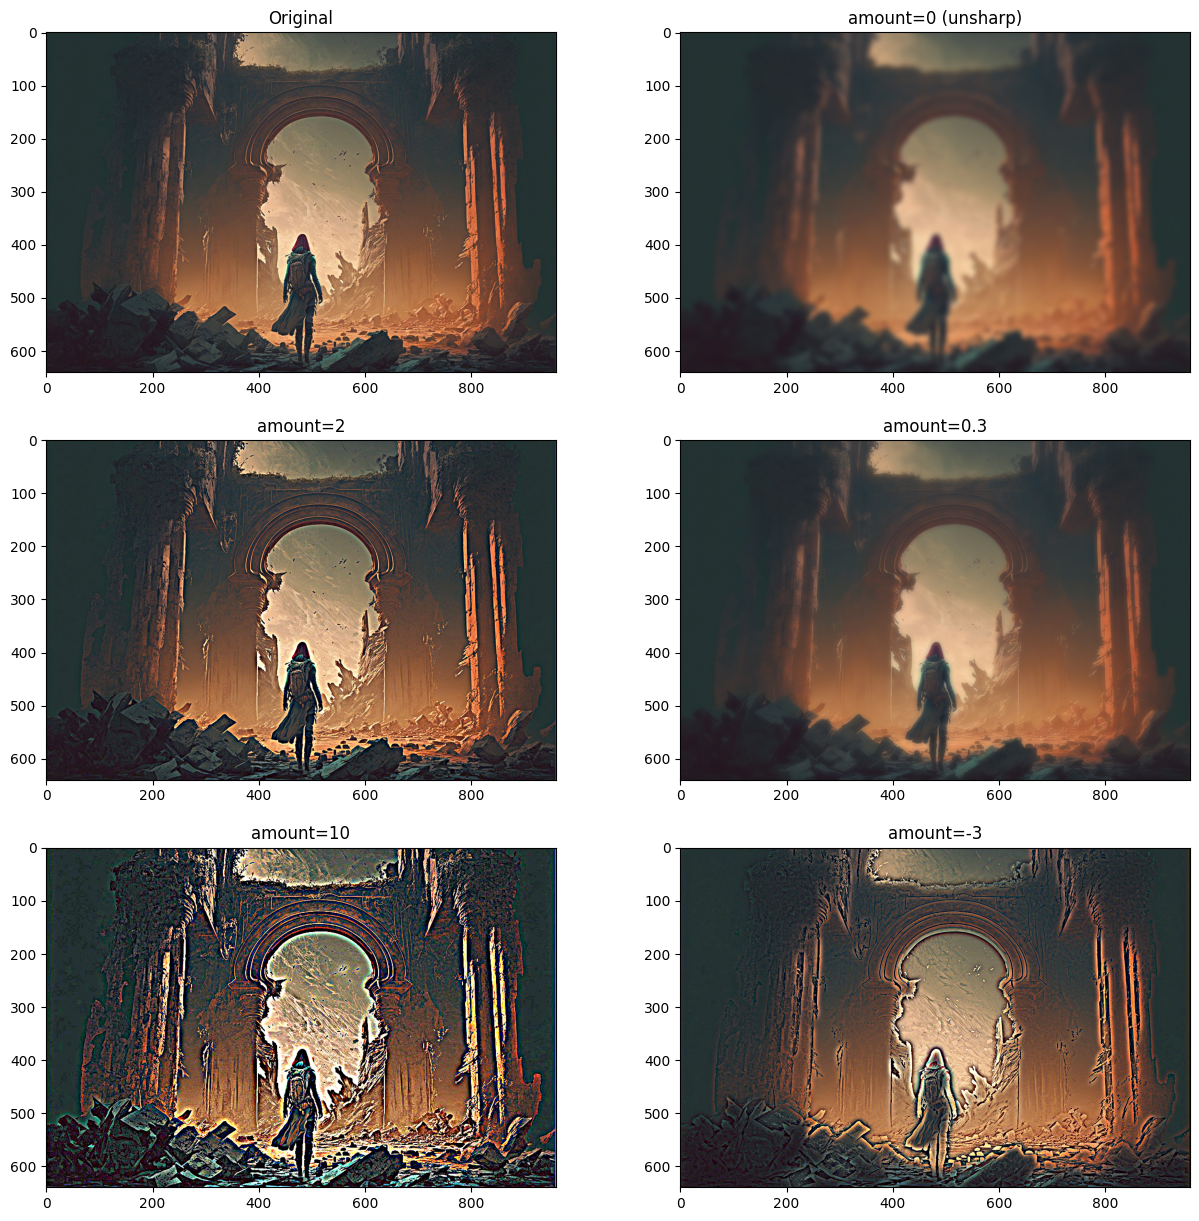

In [55]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(3, 2)
# normalization of arrays allows to use float amount
unsharp = unsharp / 255
diff = diff / 255
def draw(x, y, title, amount):
    subplot = axs[x, y]
    subplot.set_title(title)
    subplot.imshow(np.clip(unsharp + diff * amount, 0, 1))

draw(0, 0, 'amount=1 (Original)', 1)
draw(0, 1, 'amount=0 (unsharp)', 0)
draw(1, 0, 'amount=2', 2)
draw(1, 1, 'amount=0.3', 0.3)
draw(2, 0, 'amount=10', 10)
draw(2, 1, 'amount=-3', -3)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

If i need to name the amount parameter, i will choose "recovery factor". 
There are several "critical" values for it. 
* 0 < amount < 1 - we can decrease sigmas influence to the original image.
* If it equels 1 - we can recover the original image from the modified (if we have this difference of course)
* If amount is greater that 1 - we will receive a sharpening effect that is proportional to the value of this parameter.
* If amount is negative. I'll be honest. I cant describe meaning of this effect. We'll receive some kind of negatives but they haven't any special matter. 